In [1]:
import pandas as pd

In [2]:
import random

In [3]:
import numpy as np

In [4]:


data = []


for _ in range(500):
    team_name = f"Team {chr(random.randint(65,90))}"
    season = random.randint(2010, 2023)
    wins = random.randint(50,110)
    losses = 162 - wins
    hits = random.randint(1200, 1600)
    doubles = random.randint(200,350)
    triples = random.randint(10,40)
    home_runs = random.randint(100,250)
    strikeouts = random.randint(1000,1500)


    hits_adjusted = hits + (wins - 80 ) * 5
    doubles_adjusted = doubles + (wins - 80) * 2
    triples_adjusted = triples + (wins - 80)
    home_runs_adjusted = home_runs + (wins - 80) * 3
    strikeouts_adjusted = strikeouts - (wins - 80) * 10


    data.append([team_name , season , wins , losses , hits_adjusted , doubles_adjusted , triples_adjusted , home_runs_adjusted , strikeouts_adjusted ])
    


In [5]:
columns = ["Team", "seasons","wins","loses","hits","doubles","triples","home_runs","strikeouts"]

In [6]:
df  = pd.DataFrame(data , columns= columns)

In [7]:
df.head()

,Team,seasons,wins,loses,hits,doubles,triples,home_runs,strikeouts
0,Team K,2015,103,59,1523,327,36,229,1200
1,Team G,2014,97,65,1372,319,36,248,1196
2,Team H,2015,78,84,1496,346,20,148,1487
3,Team K,2012,93,69,1645,299,24,160,1192
4,Team X,2015,75,87,1176,328,16,227,1480


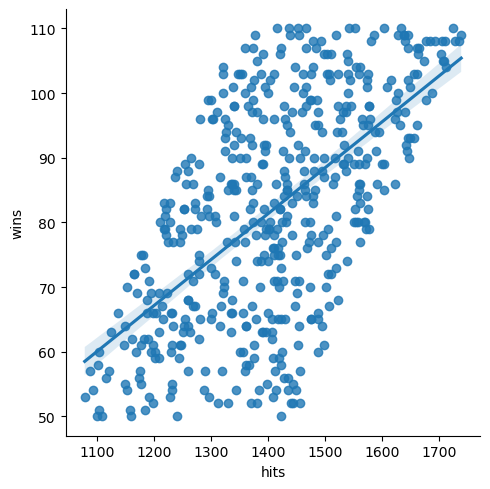

In [9]:

import seaborn as sns

import matplotlib.pyplot as plt

sns.lmplot(x ="hits" , y="wins", data=df)

plt.show()

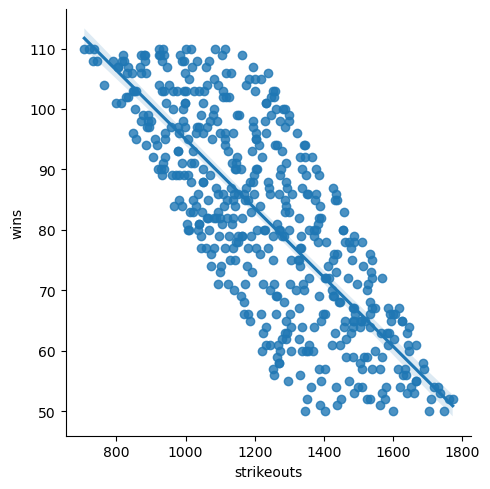

In [10]:
sns.lmplot(x="strikeouts", y="wins", data =df)
plt.show()

In [11]:
df2 = df.drop(columns = ['Team','seasons','loses'], axis =1 )

In [12]:
df2.head()

,wins,hits,doubles,triples,home_runs,strikeouts
0,103,1523,327,36,229,1200
1,97,1372,319,36,248,1196
2,78,1496,346,20,148,1487
3,93,1645,299,24,160,1192
4,75,1176,328,16,227,1480


In [13]:
df2.columns

Index(['wins', 'hits', 'doubles', 'triples', 'home_runs', 'strikeouts'], dtype='object')

In [14]:
X = df2[['hits','doubles','home_runs',"strikeouts"]]

In [15]:
y = df['wins']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:


X_train ,X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2, random_state= 24)

In [18]:


from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train , y_train)

LinearRegression()

In [21]:
lr.score(X_test, y_test)

0.7959584564640967

In [22]:
lr.score(X_train , y_train )

0.8204352546588839

In [23]:
from sklearn.metrics import  mean_absolute_error   ,mean_squared_error , r2_score

In [25]:
y_pred = lr.predict(X_test)

In [26]:
mean_absolute_error(y_test , y_pred)

5.76145107175003

In [27]:
mean_squared_error(y_test , y_pred)

51.458685559278564

In [28]:
r2_score(y_test, y_pred)

0.7959584564640967

In [29]:
lr.coef_

array([ 0.02457986,  0.0610795 ,  0.08223653, -0.02910034])

In [30]:
lr.intercept_

50.714941665944636